In [4]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '1990-01-01'
end_date = '2023-02-24'

# Set the ticker
ticker = 'AMZN'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-16,99.209999,100.629997,98.099998,98.150002,98.150002,56339200
2023-02-17,97.800003,97.940002,95.650002,97.199997,97.199997,59967700
2023-02-21,95.339996,95.610001,94.269997,94.580002,94.580002,56580400
2023-02-22,95.099998,97.010002,94.800003,95.790001,95.790001,59534100
2023-02-23,96.120003,96.430000,93.669998,95.820000,95.820000,48467000


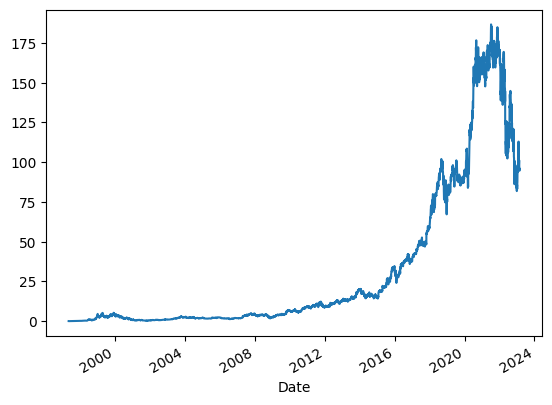

In [4]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

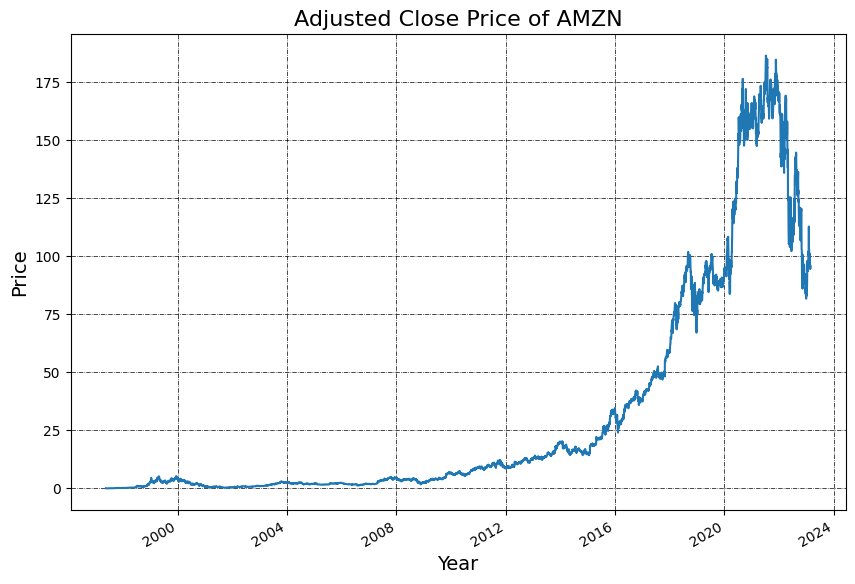

In [5]:
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

In [6]:
# Import packages
import yfinance as yf
import pandas as pd

# Set the start and end date
start_date = '1990-01-01'
end_date = '2021-07-12'

# Define the ticker list
tickers_list = ['AAPL', 'IBM', 'MSFT', 'WMT']

# Create placeholder for data
data = pd.DataFrame(columns=tickers_list)

# Fetch the data
for ticker in tickers_list:
    data[ticker] = yf.download(ticker, 
                               start_date,
                               end_date)['Adj Close']
    
# Print first 5 rows of the data
data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,AAPL,IBM,MSFT,WMT
Date,,,,
1990-01-02,0.264482,10.509355,0.384520,3.682172
1990-01-03,0.266257,10.603192,0.386687,3.682172
1990-01-04,0.267145,10.723827,0.398060,3.662637
1990-01-05,0.268033,10.697023,0.388312,3.623568
1990-01-08,0.269808,10.764044,0.394269,3.672406


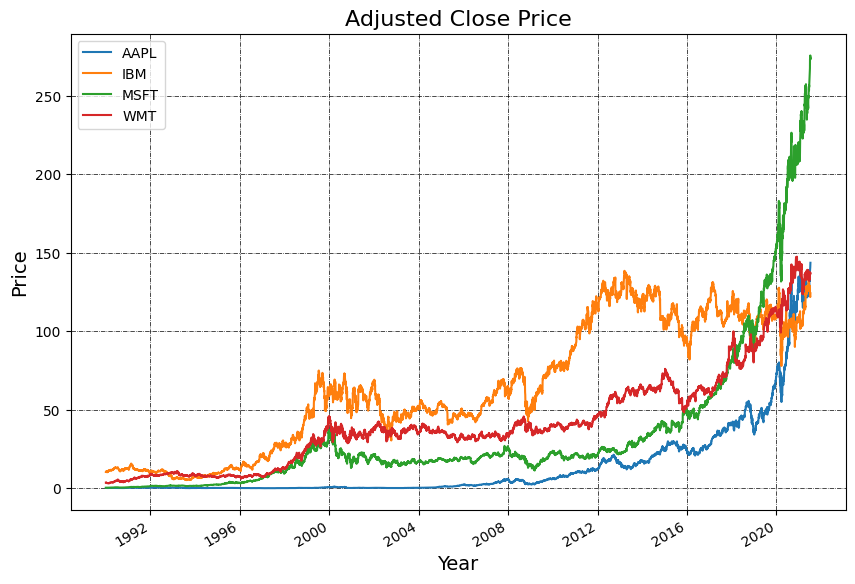

In [7]:
# Plot all the close prices
data.plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Adjusted Close Price", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [1]:
# Import packages
import yfinance as yf
import pandas as pd

# Read and print the stock tickers that make up S&P500
tickers = pd.read_html(
    'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
print(tickers.head())



  Symbol     Security             GICS Sector               GICS Sub-Industry  \
0    MMM           3M             Industrials        Industrial Conglomerates   
1    AOS  A. O. Smith             Industrials               Building Products   
2    ABT       Abbott             Health Care           Health Care Equipment   
3   ABBV       AbbVie             Health Care                 Pharmaceuticals   
4    ACN    Accenture  Information Technology  IT Consulting & Other Services   

     Headquarters Location  Date added      CIK      Founded  
0    Saint Paul, Minnesota  1957-03-04    66740         1902  
1     Milwaukee, Wisconsin  2017-07-26    91142         1916  
2  North Chicago, Illinois  1957-03-04     1800         1888  
3  North Chicago, Illinois  2012-12-31  1551152  2013 (1888)  
4          Dublin, Ireland  2011-07-06  1467373         1989  


In [2]:
# Get the data for this tickers from yahoo finance
data = yf.download(tickers.Symbol.to_list(),'2021-1-1','2021-7-12', auto_adjust=True)['Close']
print(data.head())

[*****                 11%                       ]  55 of 503 completed

: 

: 

In [2]:
# Import packages
import yfinance as yf
import pandas as pd

intraday_data = yf.download(tickers="MSFT",
                            period="5d",
                            interval="1m",
                            auto_adjust=True)
intraday_data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2023-02-17 09:30:00-05:00,259.390015,259.690002,259.019989,259.410004,1769504
2023-02-17 09:31:00-05:00,259.390015,259.750000,259.170013,259.450012,202118
2023-02-17 09:32:00-05:00,259.480011,259.989990,259.299988,259.739990,137895
2023-02-17 09:33:00-05:00,259.725006,260.089996,259.399994,259.450012,131221
2023-02-17 09:34:00-05:00,259.440002,259.809998,259.260712,259.704315,98866


In [3]:
# Import package & get the data
import yfinance as yf
intraday_data = yf.download(tickers="MSFT",
                            period="5d",
                            interval="1m",
                            auto_adjust=True)

# Define the resampling logic
ohlcv_dict = {
     'Open': 'first',
     'High': 'max',
     'Low': 'min',
     'Close': 'last',
     'Volume': 'sum'
}

# Resample the data
intraday_data_10 = intraday_data.resample('10T').agg(ohlcv_dict)
intraday_data_10.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2023-02-17 09:30:00-05:00,259.390015,260.089996,258.029999,258.160004,3144043
2023-02-17 09:40:00-05:00,258.140015,258.480011,256.600006,257.040009,1541766
2023-02-17 09:50:00-05:00,257.040009,257.279999,256.440002,257.265015,1154355
2023-02-17 10:00:00-05:00,257.230011,258.070007,257.059998,257.459900,956326
2023-02-17 10:10:00-05:00,257.390015,258.579987,257.190002,258.507996,863997


In [4]:
# Import quandl package
import quandl

# To get your API key, sign up for a free Quandl account.
# Then, you can find your API key on Quandl account settings page.
QUANDL_API_KEY = 'REPLACE-THIS-TEXT-WITH-A-REAL-API-KEY'

# This is to prompt you to change the Quandl Key
if QUANDL_API_KEY == 'REPLACE-THIS-TEXT-WITH-A-REAL-API-KEY':
    raise Exception("Please provide a valid Quandl API key!")
 
# Set the start and end date
start_date = '1990-01-01'
end_date = '2018-03-01'

# Set the ticker name
ticker = 'AMZN'

# Feth the data
data = quandl.get('WIKI/'+ticker, 
                  start_date=start_date, 
                  end_date=end_date, 
                  api_key=QUANDL_API_KEY)

# Print the first 5 rows of the dataframe
data.head()

Exception: Please provide a valid Quandl API key!

In [5]:
# Import yfinance
import yfinance as yf

# Set the ticker as MSFT
msft = yf.Ticker("MSFT")


TypeError: __init__() takes from 2 to 3 positional arguments but 4 were given

In [2]:

# get price to book
pb = msft.info['priceToBook']
pe = msft.info['regularMarketPrice']/msft.info['trailingEps']
print('Price to Book Ratio is: %.2f' % pb)
print('Price to Earnings Ratio is: %.2f' % pe)

# show revenues
revenue = msft.financials.loc['Total Revenue']
plt.bar(revenue.index, revenue.values)
plt.ylabel("Total Revenues")
plt.show()

Exception: yfinance failed to decrypt Yahoo data response

In [3]:
# show revenues
revenue = msft.financials.loc['Total Revenue']
plt.bar(revenue.index, revenue.values)
plt.ylabel("Total Revenues")
plt.show()

Exception: yfinance failed to decrypt Yahoo data response